In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
print(plt.style.available)

['ggplot', 'grayscale', 'fivethirtyeight', 'dark_background', 'bmh']


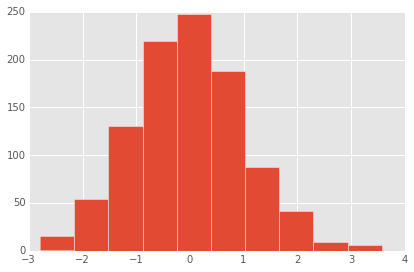

In [123]:
plt.style.use('ggplot')
data = []
for i in range(1000):
    data.append(random.normalvariate(0,1))

plt.hist(data)
plt.show()

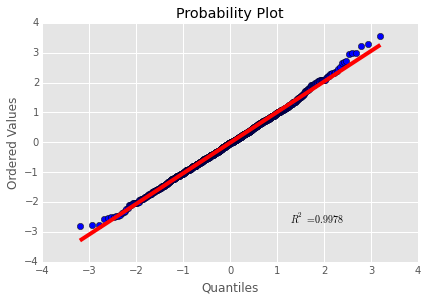

In [131]:
stats.probplot(data, dist=stats.norm, sparams=(0,1), plot=plt)
plt.show()

In [125]:
_ , pvalue = stats.normaltest(data)
if pvalue > 0.05:
    print("Data is most likely from Normal distribution")

Data is most likely from Normal distribution


In [126]:
pVals = pd.Series()
# The scipy normaltest is based on D-Agostino and Pearsons test that
# combines skew and kurtosis to produce an omnibus test of normality.
_, pVals['omnibus'] = stats.normaltest(data)

# Shapiro-Wilk test
_, pVals['Shapiro-Wilk'] = stats.shapiro(data)
    
# Or you can check for normality with Lilliefors-test
ksStats, pVals['Lilliefors'] = kstest_normal(data)
    
# Alternatively with original Kolmogorov-Smirnov test
_, pVals['KS'] = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')

In [127]:
print(pVals)

omnibus         0.092714
Shapiro-Wilk    0.164442
Lilliefors      0.907906
KS              0.984258
dtype: float64


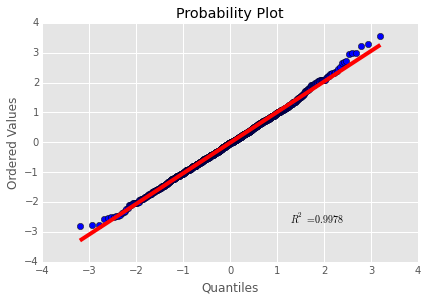

In [128]:
stats.probplot(data, plot=plt)
plt.show()

In [129]:
stats.normaltest(data)

(4.7564814423187922, 0.092713543091960254)

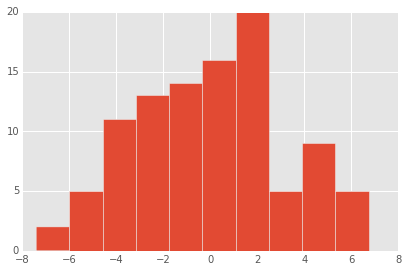

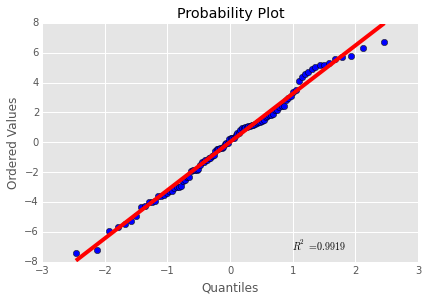

omnibus         0.588789
Shapiro-Wilk    0.505014
Lilliefors      0.902236
KS              0.987206
dtype: float64
Data are normally distributed


In [70]:
# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# additional packages
from statsmodels.stats.diagnostic import kstest_normal

myMean = 0
mySD = 3
x = np.arange(-5,15,0.1)

def check_normality():
    '''Check if the distribution is normal.'''
    # Generate and show a distribution
    numData = 100
    
    # To get reproducable values, I provide a seed value
    np.random.seed(987654321)   
    
    data = stats.norm.rvs(myMean, mySD, size=numData)
    plt.hist(data)
    plt.show()

    # --- >>> START stats <<< ---
    # Graphical test: if the data lie on a line, they are pretty much
    # normally distributed
    _ = stats.probplot(data, plot=plt)
    plt.show()

    pVals = pd.Series()
    # The scipy normaltest is based on D-Agostino and Pearsons test that
    # combines skew and kurtosis to produce an omnibus test of normality.
    _, pVals['omnibus'] = stats.normaltest(data)

    # Shapiro-Wilk test
    _, pVals['Shapiro-Wilk'] = stats.shapiro(data)
    
    # Or you can check for normality with Lilliefors-test
    ksStats, pVals['Lilliefors'] = kstest_normal(data)
    
    # Alternatively with original Kolmogorov-Smirnov test
    _, pVals['KS'] = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')
    
    print(pVals)
    if pVals['omnibus'] > 0.05:
        print('Data are normally distributed')
    # --- >>> STOP stats <<< ---
    
    return pVals['KS']
    
if __name__ == '__main__':
    p = check_normality()   

Taken from this stackoverflow [question](http://stackoverflow.com/questions/6615489/fitting-distributions-goodness-of-fit-p-value-is-it-possible-to-do-this-with/16651524)

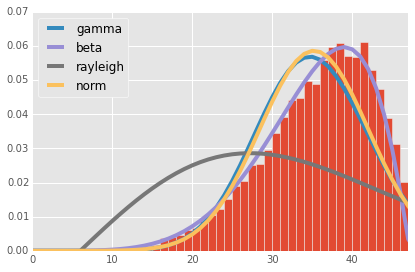

In [175]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats
size = 20000
x = scipy.arange(size)
# creating the dummy sample (using beta distribution)
y = scipy.int_(scipy.round_(scipy.stats.beta.rvs(6,2,size=size)*47))
# creating the histogram
h = plt.hist(y, bins=range(48), normed=True)

dist_names = ['gamma', 'beta', 'rayleigh', 'norm']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,47)
plt.legend(loc='upper left')
plt.show()

In [147]:
dist = getattr(scipy.stats, 'norm')

In [152]:
param = dist.fit(y)
param

(35.174599999999998, 6.7708873007900525)

In [169]:
m = [0,1,2,3,4]

In [172]:
m[-1]

4

In [159]:
param[:-2]

()

Taken from this [article](http://glowingpython.blogspot.com/2012/07/distribution-fitting-with-scipy.html)

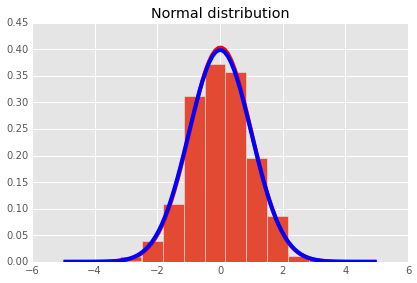

In [105]:
from scipy.stats import norm
from numpy import linspace
import matplotlib.pyplot as plt

# picking 150 of from a normal distrubution
# with mean 0 and standard deviation 1
samp = norm.rvs(loc=0,scale=1,size=1000) 

param = norm.fit(samp) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(-5,5,100)
# fitted distribution
pdf_fitted = norm.pdf(x,loc=param[0],scale=param[1])
# original distribution
pdf = norm.pdf(x)

plt.title('Normal distribution')
plt.plot(x,pdf_fitted,'r-',x,pdf,'b-')
plt.hist(samp,normed=True)
plt.show()

In [133]:
import pandas as pd

df = pd.read_excel(r'D:\temp\RDX_Battery.xlsx', 'Claims')

In [134]:
dtf = df['DAYS_TO_FAIL_MINZERO']

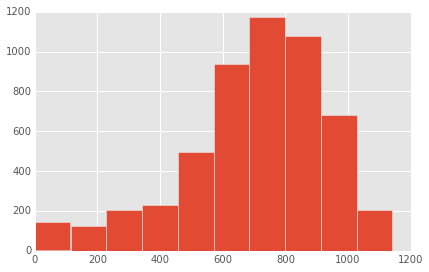

In [136]:
dtf.hist()

In [137]:
dtf.describe()

count    5275.000000
mean      701.095166
std       230.980428
min         0.000000
25%       589.000000
50%       733.000000
75%       866.000000
max      1142.000000
Name: DAYS_TO_FAIL_MINZERO, dtype: float64

In [ ]:
stats.probplot(dtf.values, dist=stats.lognorm, sparams=(0,1), plot=plt)
plt.show()